In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# aqui puedo usar una funcion de pandas que es .LOC me diante la cual puedo acceder a los valores por la etiqueta o
# el indice de el dataframe 

# df.loc[:,['Reviews']] * -1 
## mi idea es usar esto para cambiar los datos de pago a valores positivos
## aunque esos datos tienen valores anomalos 

## SEGUIR ECPLORANDO

In [4]:
# df.fillna(df.mean()) asi podre remplazar los valores nulos por el promedio

In [5]:
# .value_count() puede ser util para saber cuantos valores nulos tengo en cada columna 
## para posterior mente saber de que forma los pyedo tratar

In [6]:
## ver si tengo valores duplicados

In [7]:
## group by es poderosisimo

# ¿Que busco hacer?
en esta parte del proyecto limpiare el set de datos
- detectando y trabajando las variables nulas
- detectar y trabajar los valores oulaires en variables numericas
- detectar errores tipo graficos en variables categoricas
- manejo de columnas o datos irrelavantes 
- observaciones de la limpieza de datos ¿con cuantos datos empece y con cuantos termine?

## vistazo a como esta compuesto el set de datos

In [8]:
org_data = pd.read_csv('./archive(1)/ventas-por-factura.csv')
org_data.head(3)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"


## observacion de el tipo y cantidad de variables que hay
#### ( buena practica crear una copia del data frame para trabajar con esta cuidando el csv origina)

In [9]:
data = org_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


## OBSERVACIONES
- 4 variables de tipocategorico 
- 2 de tipo numerico 
- existen datos faltantes y estos se concentran en la ID del cliente
- *existen valores con el tipo de dato incorrecto (EL MONTO DEBE SER FLOAT NO OBJECT)*

## Cambio del tipo de dato de OBJECT  a FLOAT en la variable monto

In [10]:
# 1) crear un array vacio que almacenara los datos en su formato final
float_monto = []

# 2) cambiar en el string la ',' por el'.'
# 3) modificar el valor de str a float
for i in data['Monto']:
    change = i.replace(',','.')
    float_monto.append(float(change))
    
# 3) verifico los datos de la nueva lista
print('nuevos datos con formato de float')
print(float_monto[0:10])

# 4) agregar nueva columna con los datos cambiados al dataframe
data['New monto'] = float_monto

# 5) confirmo los cambios y el haber agregado la columna
print('--'*50)
data.info()

nuevos datos con formato de float
[229.33, 209.73, -1.45, 39.95, 344.83, 199.98, 30.0, 77.28, 67.5, 321.35]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
 6   New monto         25953 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


## OBSERVACIONES
puedo ver como ahora cuento con 7 columnas y la nueva columna tiene sus datos como tipo flotantes

# 1) Tratamiento de datos faltantes

## 1.1) Busco en donde existen los datos faltantes  

In [11]:
columns = data.columns

for col in columns:
    print(f'columna {col} : ¿hay datos faltantes? = {data[col].isnull().unique()}')

columna N° de factura : ¿hay datos faltantes? = [False]
columna Fecha de factura : ¿hay datos faltantes? = [False]
columna ID Cliente : ¿hay datos faltantes? = [False  True]
columna País : ¿hay datos faltantes? = [False]
columna Cantidad : ¿hay datos faltantes? = [False]
columna Monto : ¿hay datos faltantes? = [False]
columna New monto : ¿hay datos faltantes? = [False]


## OBSERVAICONES
Solo existen datos faltantes en la columna de ID Cliente

In [12]:
num_data = data.shape[0]
num_data

data_nan = data['ID Cliente'].isnull()
num_nan = []
for i in data_nan:
    if i == True:
        num_nan.append(i)
        
print(f'la cantidad de datos faltantes es de : {len(num_nan)}')

la cantidad de datos faltantes es de : 3724


In [13]:
# de esta forma corroboro si la cantidad indicada concide con la que he hallado
num_data - len(num_nan)

22229

## 1.2) En este caso el equipo decidio borrar la columna de datos faltantes
- se decidio borrar esta columna aun conociendo que existen tecnicas como la imputacios para trabajar con este tipo de datos, se espera en un futura poder implementar esta y mas tecnicas

In [14]:
print(f'tamaño del dataset antes de borrar datos nulos {data.shape}')
data.dropna(inplace=True)
print(f'tamaño del dataset despues de borrar datos nulos {data.shape}')

tamaño del dataset antes de borrar datos nulos (25953, 7)
tamaño del dataset despues de borrar datos nulos (22229, 7)


## 1.3) Se decidio de igual forma borrar los datos de las filas que estuvieran repetidos
- ya que tener datos repetidos podria alterar en un futuro un analisis exploratorio de datos

In [15]:
print(f'tamaño del dataset antes de borrar datos repetidos {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño del dataset despues de borrar datos repetidos {data.shape}')

tamaño del dataset antes de borrar datos repetidos (22229, 7)
tamaño del dataset despues de borrar datos repetidos (22221, 7)


## 1.4) Eliminacion de columnas irrelevantes o redundantes

In [16]:
# se eliminara la columna de Monto ya que esta contiene informacion redundante y en formato erroneo
data.drop('Monto', axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22221 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     22221 non-null  object 
 1   Fecha de factura  22221 non-null  object 
 2   ID Cliente        22221 non-null  float64
 3   País              22221 non-null  object 
 4   Cantidad          22221 non-null  int64  
 5   New monto         22221 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [18]:
## EL tamaño del set de datos se queda en 
data.shape

(22221, 6)

## 2) trabajaremos con los datos numericos 
- buscamos ver como se comportan estos valores 

In [19]:
data.describe()

,ID Cliente,Cantidad,New monto
count,22221.000000,22221.000000,22221.000000
mean,15238.398317,220.822105,373.523505
std,1732.987098,1169.306198,2016.999501
min,12346.000000,-80995.000000,-168469.600000
25%,13755.000000,30.000000,87.440000
50%,15136.000000,120.000000,240.680000
75%,16746.000000,254.000000,417.620000
max,18287.000000,80995.000000,168469.600000


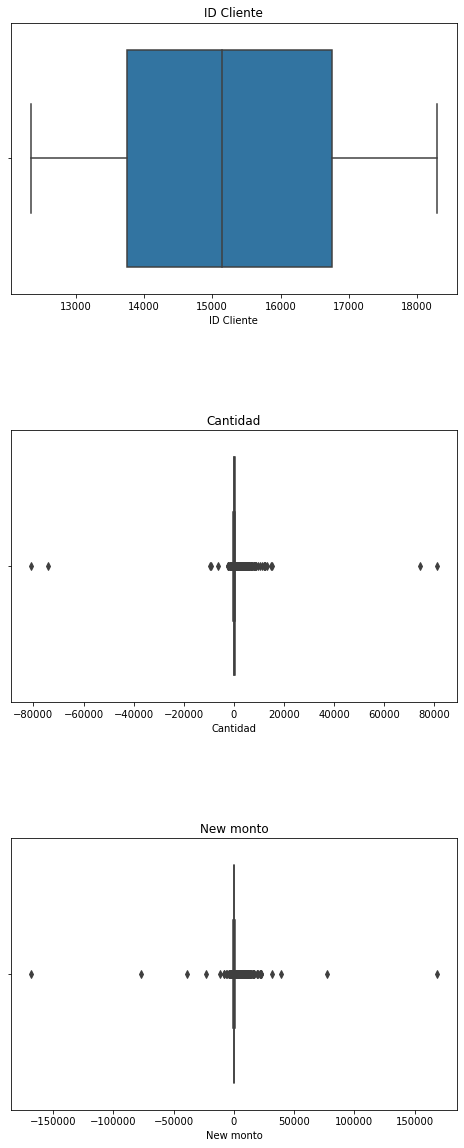

In [20]:
## variables numericas
data_num = ['ID Cliente', 'Cantidad', 'New monto']

## cantidad y espacio donde creare las graficas
fig, ax = plt.subplots(nrows=(len(data_num)), ncols=1,figsize=(8,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data_num):
    sns.boxplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col)
    


## tratamiento de valores negativos
- veremos si estos valores tienen la misma poscicion tanto en monto como en cantidad para de esta forma si coinciden se tomaran desciciones acerca de estos tales como volverlos positivos

In [21]:
data.head(3)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,New monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,-1.45


In [22]:
## 1) crear una lista con los indices de los montos negativs
## 2) crear una lista con los indices de las cantidad engativas
## 3) compara las lista y ver si son iguales
monto = data['New monto']
cantidad = data.Cantidad

neg_index_monto = []
neg_index_cantidad = []

# 1) crear y llenar una lista con los indices de los montos negativos
for index, values in enumerate(monto):
    if values < 0:
        neg_index_monto.append(index)
        
# 2) crear y llenar una lista con los indices de las cantidades negativas
for index, values in enumerate(cantidad):
    if values < 0:
        neg_index_cantidad.append(index)
        
# 3) compara las listas y ver si son iguales
## usare una funcion de numpy que se encargara de estp

np_monto = np.array(neg_index_monto)
np_cantidad = np.array(neg_index_cantidad)

print(f'numpy estas listas son iguales: {np.array_equal(np_monto, np_cantidad)}')

numpy estas listas son iguales: True


In [23]:
print(f'valores en monto {len(np_monto)}, valores de cantidad {len(np_cantidad)}')



valores en monto 3655, valores de cantidad 3655


#### al ser iguales las posiciones se vera si e xiste una relacion entre la cantidad y el monto si esta s e mantiene los datos se convertirarn en datos positivos

In [24]:
## 1) creacion de las listas que contendran los valores negativos

monto_negativo = []
monto = np.array(data['New monto'])

cantidad_negativa = []
cantidad = np.array(data['Cantidad'])

## las llenare con ayuda de los indices que previamente tengo

##monto_Negativo
for i in np_monto:
    monto_negativo.append(monto[i])

## cantidad negativa 
for i in np_cantidad:
    cantidad_negativa.append(cantidad[i])

## 2) dividire el monto entre la cantidad y si la lista resultante resulta tener cantidades iguales podre decir 
## que los valores son crreospondientessolo que en su forma negativa
relacion=[]

for i in range(len(monto_negativo)):
    monto = monto_negativo[i]
    cantidad = cantidad_negativa[i]
    resultado = monto/cantidad
    relacion.append(resultado)

print(relacion[0:50])

[1.45, 1.85, 0.65, 5.616666666666667, 3.75, 9.95, 0.85, 3.75, 3.25, 12.15, 11.95, 1.25, 1.95, 0.8346428571428571, 3.4257894736842105, 1.6, 40.0, 0.07, 2.4, 3.9076923076923076, 3.69, 8.5, 1.95, 0.75, 1.95, 1.25, 4.616666666666666, 6.998333333333334, 1.2582252559726963, 8.5, 0.19999999999999998, 2.59, 2.091304347826087, 1.2024029574861368, 3.016666666666667, 12.75, 1.25, 3.75, 1.0187772925764194, 3.95, 4.57, 2.9499999999999997, 0.87, 1.25, 10.950000000000001, 12.75, 9.950000000000001, 1.65, 6.183333333333334, 5.416666666666667]


## Observaicones
- no existe una relacion entre precio y monto asi que se decidio borrar estos negativos ya que por ahora no podremos saber si esto se debe a que se vendieron diferentes articulos o el mismo 

# eliminacion de los datos con valores negativos

In [25]:
print(f'cantidad de datos antes de borrar los valores negativos {data.shape}')
data = data[data['Cantidad'] > 0]
print(f'cantidad de datos despues de borrar los valores negativos {data.shape}')

cantidad de datos antes de borrar los valores negativos (22221, 6)
cantidad de datos despues de borrar los valores negativos (18566, 6)


##  OBSERVACIONES 
- se cuentan con valores atipicos positivos 

## veo como se ven los datos sin estos valores atipicos

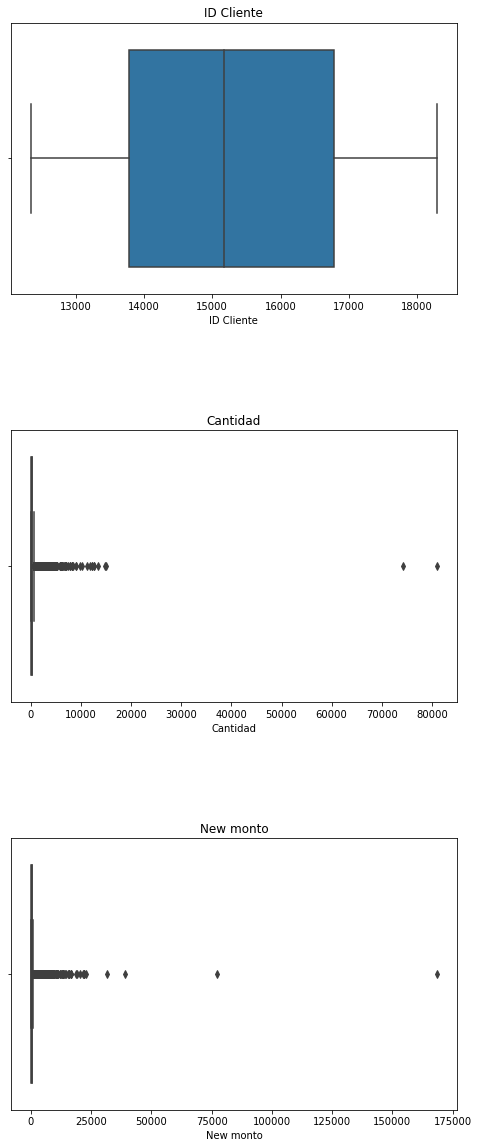

In [26]:
## variables numericas
data_num = ['ID Cliente', 'Cantidad', 'New monto']

## cantidad y espacio donde creare las graficas
fig, ax = plt.subplots(nrows=(len(data_num)), ncols=1,figsize=(8,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data_num):
    sns.boxplot(data=data, x=col, ax=ax[i], showfliers=True)
    ax[i].set_title(col)
    


# visualizacion de los datos sin valores atipicos

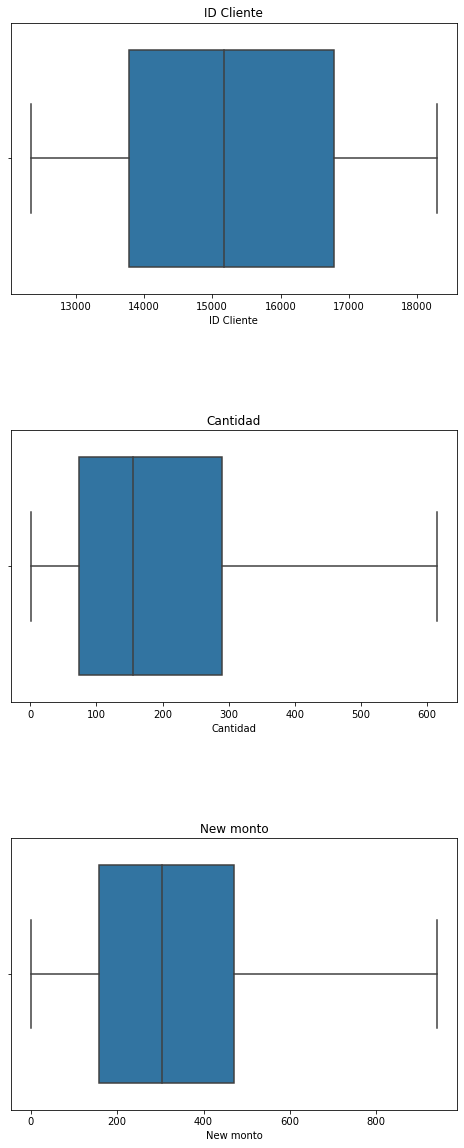

In [27]:
## variables numericas
data_num = ['ID Cliente', 'Cantidad', 'New monto']

## cantidad y espacio donde creare las graficas
fig, ax = plt.subplots(nrows=(len(data_num)), ncols=1,figsize=(8,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data_num):
    sns.boxplot(data=data, x=col, ax=ax[i], showfliers=False)
    ax[i].set_title(col)
    


## 3) Tratamiento de variables categoricas

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18566 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     18566 non-null  object 
 1   Fecha de factura  18566 non-null  object 
 2   ID Cliente        18566 non-null  float64
 3   País              18566 non-null  object 
 4   Cantidad          18566 non-null  int64  
 5   New monto         18566 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1015.3+ KB


In [29]:
category_columns = ['N° de factura','Fecha de factura','País']
## ver los subniveles que tienen las variables categoricas
for col in category_columns:
    print(f'columna {col}: tiene {data[col].nunique()} subniveles')


columna N° de factura: tiene 18536 subniveles
columna Fecha de factura: tiene 17286 subniveles
columna País: tiene 37 subniveles


## OBSERVACIONES
1) se aprecia que existen muchos subniveles en la fecha lo que se hara es:
- cambiar las fechas a un tipo de dato trabajable
- crear una columna para categorizar las ventas solo por mes

2) se aprecia que existen muchos subniveles de facturas aun no se decide que se hara con estos datos

In [30]:
# 1) crear una nueva columna con las fechas en formato DATETIME
## lista antigua con las  fechas en formato STR y nueva lista que guardara los DATETIME
old_fecha = data['Fecha de factura']
new_fecha = []

## covnersion de las fechas de str a datetime y guardado en la nueva lista 
for i in old_fecha:
    a = datetime.strptime(i, '%m/%d/%Y %H:%M:%S')
    new_fecha.append(a)
    
## corroboracin del cambio de formato
print('antiguo formato de fecha')
print(type(old_fecha[0]))
print('--'*50)
print('nuevo formato de fecha')
print(type(new_fecha[0]))

antiguo formato de fecha
<class 'str'>
----------------------------------------------------------------------------------------------------
nuevo formato de fecha
<class 'datetime.datetime'>


In [31]:
data.head(10)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,New monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98
6,538125,12/9/2020 15:46:00,18225.0,United Kingdom,16,30.00
7,544354,2/18/2021 10:42:00,13489.0,United Kingdom,64,77.28
8,546369,3/11/2021 11:41:00,15513.0,United Kingdom,10,67.50
9,570651,10/11/2021 13:34:00,14911.0,EIRE,86,321.35
13,575581,11/10/2021 11:53:00,12659.0,France,105,91.68


In [91]:
# 2) CREACION DE UNA COLUMNA NUEVA CON EL MES DE LA VENTA
## lista con el valor de mes en formato de numeros
number_month = []
for i in new_fecha:
    a = i.month
    number_month.append(a)
    


## lista que almacenar los meses de venta
Sale_month = []
Months = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

## se creara un ciclo para llenar la lista con los valores del mes en formato texto
for i in number_month:
    a = Months[i-1]
    Sale_month.append(a)

    

[3, 11, 4, 10, 11, 12, 2, 3, 10, 11, 12, 2, 8, 3, 11, 4, 11, 10, 12, 5, 4, 6, 4, 11, 9, 9, 12, 12, 1, 11, 9, 8, 8, 12, 11, 7, 10, 11, 10, 1, 5, 9, 11, 10, 11, 11, 1, 7, 11, 7, 12, 10, 12, 5, 8, 1, 7, 9, 1, 10, 12, 4, 6, 8, 8, 11, 5, 10, 3, 6, 10, 2, 8, 10, 6, 12, 7, 4, 9, 6, 3, 6, 10, 1, 3, 6, 3, 6, 2, 5, 1, 1, 12, 3, 5, 9, 7, 3, 9, 7, 1, 10, 11, 4, 6, 7, 3, 11, 10, 2, 5, 4, 10, 3, 10, 8, 5, 12, 11, 3, 7, 7, 12, 4, 9, 12, 5, 12, 3, 6, 5, 4, 11, 11, 11, 3, 6, 9, 11, 4, 3, 11, 7, 9, 11, 11, 1, 11, 12, 1, 11, 7, 1, 11, 6, 9, 8, 7, 9, 8, 4, 11, 10, 11, 2, 2, 8, 9, 9, 4, 1, 11, 7, 7, 11, 3, 8, 8, 12, 10, 9, 5, 12, 3, 10, 1, 9, 4, 1, 4, 10, 12, 6, 7, 5, 9, 12, 8, 9, 12, 10, 10, 1, 3, 7, 10, 11, 11, 6, 11, 11, 10, 9, 12, 5, 1, 2, 9, 2, 12, 4, 11, 2, 1, 2, 5, 5, 1, 9, 12, 7, 9, 5, 3, 3, 2, 1, 3, 5, 12, 8, 2, 8, 11, 10, 10, 4, 1, 10, 10, 9, 5, 2, 5, 5, 4, 2, 11, 2, 11, 10, 6, 1, 5, 4, 8, 2, 11, 2, 2, 4, 11, 3, 11, 9, 10, 5, 9, 4, 11, 6, 1, 8, 2, 6, 10, 7, 11, 11, 3, 2, 8, 6, 10, 12, 7, 12, 10, 

In [36]:
# 3) creacion de una columna nueva con los años de ventas
Sale_year = []

for i in data['fecha_datetime']:
    a = i.year
    Sale_year.append(a)


In [38]:
# 4) creacion de una columna con el año y mes de venta
year_month_sale = []
for i in data['fecha_datetime']:
    a  = i.strftime('%Y %m')
    year_month_sale.append(a)

## se agregara en el dataframe las nuevas columnas y se eleminara alguna otra que sea redundante

- se eliminara la columna de 'Fecha factura ya que contiene informacion redundante

In [39]:
data['fecha_datetime'] = new_fecha
data['Sale_month'] = Sale_month
data['Sale_year'] = Sale_year
data['year_month_sale'] = year_month_sale

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18566 entries, 0 to 25951
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   N° de factura     18566 non-null  object        
 1   Fecha de factura  18566 non-null  object        
 2   ID Cliente        18566 non-null  float64       
 3   País              18566 non-null  object        
 4   Cantidad          18566 non-null  int64         
 5   New monto         18566 non-null  float64       
 6   fecha_datetime    18566 non-null  datetime64[ns]
 7   Sale_month        18566 non-null  object        
 8   Sale_year         18566 non-null  int64         
 9   year_month_sale   18566 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 2.1+ MB


In [41]:
data.shape

(18566, 10)

In [42]:
data.drop('Fecha de factura', axis=1, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18566 entries, 0 to 25951
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   N° de factura    18566 non-null  object        
 1   ID Cliente       18566 non-null  float64       
 2   País             18566 non-null  object        
 3   Cantidad         18566 non-null  int64         
 4   New monto        18566 non-null  float64       
 5   fecha_datetime   18566 non-null  datetime64[ns]
 6   Sale_month       18566 non-null  object        
 7   Sale_year        18566 non-null  int64         
 8   year_month_sale  18566 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [44]:

print('---'*20)
print(f'nuevo tamaño de dataset {data.shape}')

------------------------------------------------------------
nuevo tamaño de dataset (18566, 9)


In [45]:
category_columns = ['N° de factura','Sale_month','País', 'fecha_datetime', 'Sale_year', 'year_month_sale']
## ver los subniveles que tienen las variables categoricas
for col in category_columns:
    print(f'columna {col}: tiene {data[col].nunique()} subniveles')


columna N° de factura: tiene 18536 subniveles
columna Sale_month: tiene 12 subniveles
columna País: tiene 37 subniveles
columna fecha_datetime: tiene 17286 subniveles
columna Sale_year: tiene 2 subniveles
columna year_month_sale: tiene 13 subniveles


# trabajo con variables categoricas 
puedo apreciar que no se presentan errors de escritura que puedan interferir con la intrepretacion de los datos

- **ocurre que existen demasiados paises y no puedo apreciar bien que paises hay SERA OPTIMO VER CUANTOS PAISES COMPRAN QUIEN COMPRA MAS Y QUE HACER CON ESTOS PAISES QUE COMPRAN POCO**

- **Las ventas de DICIEMBRE DEL 2022 influyen en las ventas del 2021**

- ver como tratar estas ventas

Text(0.5, 1.0, 'ventas por mes')

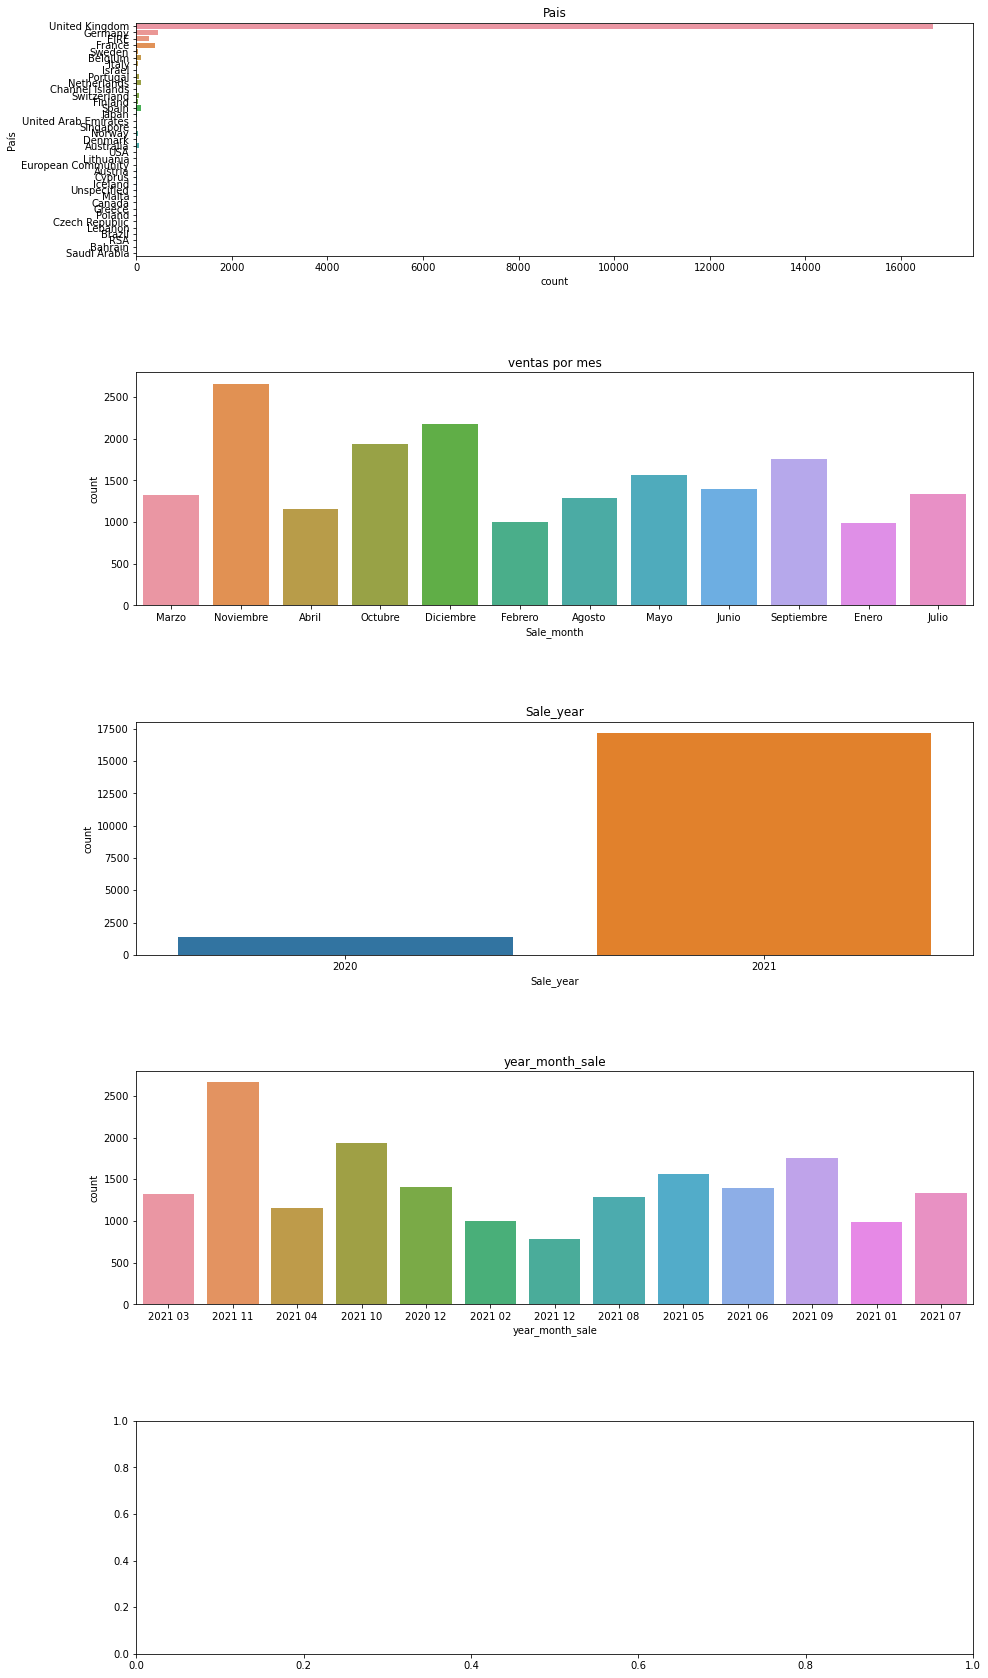

In [46]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)

sns.countplot(data=data, y=data.País, ax=ax[0])
ax[0].set_title('Pais')
sns.countplot(data=data, x=data.Sale_month, ax=ax[1])
ax[1].set_title('ventas por mes')
sns.countplot(data=data, x=data.Sale_year, ax=ax[2])
ax[2].set_title('Sale_year')
sns.countplot(data=data, x=data.year_month_sale, ax=ax[3])
ax[3].set_title('year_month_sale')
sns.countplot(data=data, x=data.Sale_month, ax=ax[1])
ax[1].set_title('ventas por mes')

## se agruparan los apises por continente para su mejor apreciasion

In [47]:
(data.shape[1])

9

In [48]:
data.head()

,N° de factura,ID Cliente,País,Cantidad,New monto,fecha_datetime,Sale_month,Sale_year,year_month_sale
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Marzo,2021,2021 03
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Noviembre,2021,2021 11
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Abril,2021,2021 04
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Octubre,2021,2021 10
5,576630,13816.0,Germany,91,199.98,2021-11-16 08:38:00,Noviembre,2021,2021 11


In [49]:
## crear un diccionario para facilitar la visualizacion de los diferentes paises
## importo las librerias correspondientes
import collections
paises = np.array(data.País)
diccionario_count = collections.Counter(paises)
print(diccionario_count)

Counter({'United Kingdom': 16676, 'Germany': 457, 'France': 390, 'EIRE': 261, 'Belgium': 98, 'Netherlands': 95, 'Spain': 90, 'Portugal': 57, 'Australia': 57, 'Switzerland': 51, 'Finland': 41, 'Italy': 38, 'Sweden': 36, 'Norway': 36, 'Channel Islands': 26, 'Japan': 20, 'Poland': 19, 'Denmark': 18, 'Austria': 17, 'Cyprus': 16, 'Unspecified': 8, 'Singapore': 7, 'Iceland': 7, 'Canada': 6, 'Israel': 5, 'USA': 5, 'Malta': 5, 'Greece': 5, 'Lithuania': 4, 'European Community': 4, 'United Arab Emirates': 3, 'Czech Republic': 2, 'Bahrain': 2, 'Lebanon': 1, 'Brazil': 1, 'RSA': 1, 'Saudi Arabia': 1})


In [83]:
# creare una lista con los paises encapsulados por continente
europa = ['United Kingdom','Germany','France','EIRE','Belgium', 'Netherlands', 'Spain', 'Portugal', 'Australia', 'Switzerland', 'Finland', 'Italy', 'Sweden', 'Norway', 'Channel Islands', 'Poland', 'Denmark', 'Austria', 'Cyprus', 'Iceland', 'Malta', 'Greece', 'Lithuania', 'European Community','Czech Republic']
asia = ['Japan','Singapore']
medio_oriente = ['Israel','United Arab Emirates', 'Bahrain', 'Lebanon','Saudi Arabia']
america = ['Canada', 'USA', 'Brazil']
africa = ['RSA']

In [84]:
# tengo 37 paises 
suma = (len(europa) + len(asia) + len(medio_oriente) + len(america) + len(africa))
print(suma)

36


In [85]:
## creare una lista que almacenara el continente del pais correspondiente
paises = np.array(data.País)
sale_continente = []

# creare un ciclo enel cual diferentes condicines le asignaran el valor del continente dependiedo del valor que
## tenga el iterador

for i in paises:

    if i in europa:
        sale_continente.append('Europa')
        
    elif i in asia:
        sale_continente.append('Asia')
        
    elif i in america:
        sale_continente.append('America')
        
    elif i in africa:
        sale_continente.append('Africa')
        
    elif i in medio_oriente:
        sale_continente.append('Medio oriente')
    
    else:
        sale_continente.append(np.nan)

print(len(sale_continente))

18566


In [86]:
import collections

diccionario_count = collections.Counter(sale_continente)
print(diccionario_count)

Counter({'Europa': 18506, 'Asia': 27, 'Medio oriente': 12, 'America': 12, nan: 8, 'Africa': 1})


# MUY BIENNNNN LO LOGRASTEEEEEE
jader mi muchachonnn

In [87]:
data['sale_continente']= sale_continente

In [88]:
data.head(4)

,N° de factura,ID Cliente,País,Cantidad,New monto,fecha_datetime,Sale_month,Sale_year,year_month_sale,sale_continente
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30 16:14:00,Marzo,2021,2021 03,Europa
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11 11:11:00,Noviembre,2021,2021 11,Europa
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06 12:08:00,Abril,2021,2021 04,Europa
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27 15:33:00,Octubre,2021,2021 10,Europa


<function matplotlib.pyplot.show(close=None, block=None)>

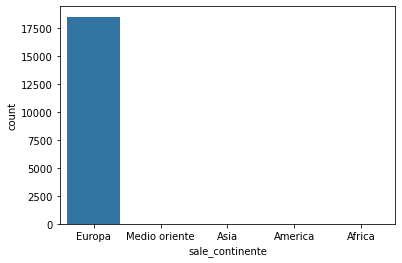

In [90]:
sns.countplot(data=data, x='sale_continente')
plt.show